Sum NA Sales (in millions): 4392.75

Sum EU Sales (in millions): 2433.97

Sum JP Sales (in millions): 1290.01

Sum Other Sales (in millions): 797.64

Total Sales globally (in millions): 8914.37

Percentage of NA Sales: 49.28%
Percentage of EU Sales: 27.30%
Percentage of JP Sales: 14.47%
Percentage of Other Sales: 8.95%


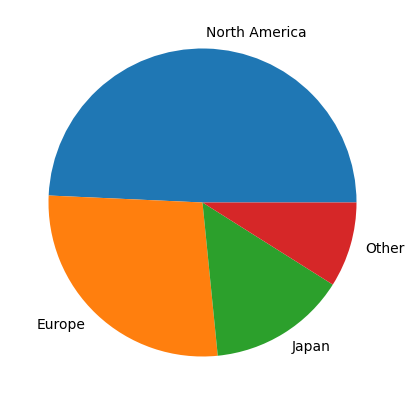


       NA_Sales  EU_Sales  JP_Sales  Other_Sales
0         41.49     29.02      3.77         8.46
1         29.08      3.58      6.81         0.77
2         15.85     12.88      3.79         3.31
3         15.75     11.01      3.28         2.96
4         11.27      8.89     10.22         1.00
...         ...       ...       ...          ...
16593      0.01      0.00      0.00         0.00
16594      0.01      0.00      0.00         0.00
16595      0.00      0.00      0.00         0.00
16596      0.00      0.01      0.00         0.00
16597      0.01      0.00      0.00         0.00

[16598 rows x 4 columns]


In [13]:
import pandas as pd
import matplotlib.pyplot as plt


#reading the excel file
totalsales = pd.read_excel(r'C:\Users\gusta\Desktop\Programação\Testes\Python\Project2\game_sales_data.xlsx', sheet_name = 'TotalSalesRegion')

#total sum from NA column
sumna = (totalsales['NA_Sales'].sum())

#total sum from EU column
sumeu = (totalsales['EU_Sales'].sum())

#total sum from JP column
sumjp = (totalsales['JP_Sales'].sum())

#total sum from Other column
sumot = (totalsales['Other_Sales'].sum())

#total sum of ALL the columns
sumtotal = sumna + sumeu + sumjp + sumot

#Percentage of sales per region
percna = (sumna / sumtotal) * 100 
perceu = (sumeu / sumtotal) * 100 
percjp = (sumjp / sumtotal) * 100  
percot = (sumot / sumtotal) * 100

#printing results
print(f'Sum NA Sales (in millions): {sumna:.2f}\n')
print(f'Sum EU Sales (in millions): {sumeu:.2f}\n')
print(f'Sum JP Sales (in millions): {sumjp:.2f}\n')
print(f'Sum Other Sales (in millions): {sumot:.2f}\n')
print(f'Total Sales globally (in millions): {sumtotal:.2f}\n')

#percentage per region
print(f'Percentage of NA Sales: {percna:.2f}''%')
print(f'Percentage of EU Sales: {perceu:.2f}''%')
print(f'Percentage of JP Sales: {percjp:.2f}''%')
print(f'Percentage of Other Sales: {percot:.2f}''%')

#pie chart
piechart = [percna, perceu, percjp, percot]
char = plt.figure(figsize = (9, 5))
plt.pie(piechart, labels = ('North America', 'Europe', 'Japan', 'Other'))
plt.show()


#printing the excel sheet
print(f'\n{totalsales}')

In [9]:
mostsoldgame = pd.read_excel(r'C:\Users\gusta\Desktop\Programação\Testes\Python\Project2\game_sales_data.xlsx', sheet_name = 'MostSoldGame', index_col = 0)
print(mostsoldgame)

                                                  NA_Sales  EU_Sales  \
Name                                                                   
Wii Sports                                           41.49     29.02   
Super Mario Bros.                                    29.08      3.58   
Mario Kart Wii                                       15.85     12.88   
Wii Sports Resort                                    15.75     11.01   
Pokemon Red/Pokemon Blue                             11.27      8.89   
...                                                    ...       ...   
Woody Woodpecker in Crazy Castle 5                    0.01      0.00   
Men in Black II: Alien Escape                         0.01      0.00   
SCORE International Baja 1000: The Official Game      0.00      0.00   
Know How 2                                            0.00      0.01   
Spirits & Spells                                      0.01      0.00   

                                                  JP_Sales  Oth